In [268]:
import pandas as pd
churn_data = pd.read_csv(r'C:\Users\seans\Documents\WGU\D206\churn_raw_data.csv')
print(churn_data)
churn_data.info()

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              1          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1              2          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2              3          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3              4          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4              5          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...          ...        ...         ...                                   ...   
9995        9996       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996        9997       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997        9998       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998        9999       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999       10000      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

              City State   

In [269]:
pd.set_option('display.max_columns', 52)
print (churn_data.head(2))

   Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0           1          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1           2          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   

          City State                 County    Zip       Lat        Lng  \
0  Point Baker    AK  Prince of Wales-Hyder  99927  56.25100 -133.37571   
1  West Branch    MI                 Ogemaw  48661  44.32893  -84.24080   

   Population   Area         Timezone                                Job  \
0          38  Urban    America/Sitka  Environmental health practitioner   
1       10446  Urban  America/Detroit             Programmer, multimedia   

   Children   Age                    Education Employment    Income  Marital  \
0       NaN  68.0              Master's Degree  Part Time  28561.99  Widowed   
1       1.0  27.0  Regular High School Diploma    Retired  21704.77  Married   

   Gender Churn  Outage_sec_perweek  Email  Contacts  Yearly_equip_fa

In [270]:
# Import Packages
import numpy as np
import scipy as sp
import scipy.stats as stats
import sklearn as sk
import matplotlib as mpl
import matplotlib.pyplot as mpl
import seaborn
# define and drop empty and redundant columns
id = churn_data.Customer_id
id.is_unique
churn_data.drop(columns=['Unnamed: 0', 'CaseOrder', 'Interaction'], inplace=True)
# View table and data types
print(churn_data)
# check for equal values, should be 10000 with header
print(churn_data.head(2))

     Customer_id          City State                 County    Zip       Lat  \
0        K409198   Point Baker    AK  Prince of Wales-Hyder  99927  56.25100   
1        S120509   West Branch    MI                 Ogemaw  48661  44.32893   
2        K191035       Yamhill    OR                Yamhill  97148  45.35589   
3         D90850       Del Mar    CA              San Diego  92014  32.96687   
4        K662701     Needville    TX              Fort Bend  77461  29.38012   
...          ...           ...   ...                    ...    ...       ...   
9995     M324793   Mount Holly    VT                Rutland   5758  43.43391   
9996     D861732   Clarksville    TN             Montgomery  37042  36.56907   
9997     I243405      Mobeetie    TX                Wheeler  79061  35.52039   
9998     I641617    Carrollton    GA                Carroll  30117  33.58016   
9999      T38070  Clarkesville    GA              Habersham  30523  34.70783   

            Lng  Population      Area  

In [271]:
#The eight survey items were not labeled properly and need to fixed
churn_data.rename(columns = 
{'item1':'item1_responses',
'item2':'item2_fixes',
'item3':'item3_replacements',
'item4':'item4_reliability',
'item5':'item5_options',
'item6':'item6_respectfulness',
'item7':'item7_courteous',
'item8':'item8_listening'},
inplace=True)
print(churn_data.head(2))

  Customer_id         City State                 County    Zip       Lat  \
0     K409198  Point Baker    AK  Prince of Wales-Hyder  99927  56.25100   
1     S120509  West Branch    MI                 Ogemaw  48661  44.32893   

         Lng  Population   Area         Timezone  \
0 -133.37571          38  Urban    America/Sitka   
1  -84.24080       10446  Urban  America/Detroit   

                                 Job  Children   Age  \
0  Environmental health practitioner       NaN  68.0   
1             Programmer, multimedia       1.0  27.0   

                     Education Employment    Income  Marital  Gender Churn  \
0              Master's Degree  Part Time  28561.99  Widowed    Male    No   
1  Regular High School Diploma    Retired  21704.77  Married  Female   Yes   

   Outage_sec_perweek  Email  Contacts  Yearly_equip_failure Techie  \
0            6.972566     10         0                     1     No   
1           12.014541     12         0                     1    Yes 

In [272]:
#Time to find data types
churn_data.count()
churn_data.dtypes
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   City                  10000 non-null  object 
 2   State                 10000 non-null  object 
 3   County                10000 non-null  object 
 4   Zip                   10000 non-null  int64  
 5   Lat                   10000 non-null  float64
 6   Lng                   10000 non-null  float64
 7   Population            10000 non-null  int64  
 8   Area                  10000 non-null  object 
 9   Timezone              10000 non-null  object 
 10  Job                   10000 non-null  object 
 11  Children              7505 non-null   float64
 12  Age                   7525 non-null   float64
 13  Education             10000 non-null  object 
 14  Employment            10000 non-null  object 
 15  Income              

In [273]:
#Check for the distinct values in each column to inform the categorical replacements
print(churn_data['Employment'].unique())
print(churn_data['Job'].unique())
print(churn_data['Area'].unique())
print(churn_data['Timezone'].unique())
print(churn_data['Education'].unique())
print(churn_data['State'].unique())
print(churn_data['County'].unique())
print(churn_data['Marital'].unique())
print(churn_data['Children'].unique())
print(churn_data['Age'].unique())
print(churn_data['Gender'].unique())
print(churn_data['Contract'].unique())
print(churn_data['PaymentMethod'].unique())

['Part Time' 'Retired' 'Student' 'Full Time' 'Unemployed']
['Environmental health practitioner' 'Programmer, multimedia'
 'Chief Financial Officer' 'Solicitor' 'Medical illustrator'
 'Chief Technology Officer' 'Surveyor, hydrographic'
 'Sales promotion account executive' 'Teaching laboratory technician'
 'Museum education officer' 'Teacher, special educational needs'
 'Maintenance engineer' 'Engineer, broadcasting (operations)'
 'Learning disability nurse' 'Automotive engineer'
 'Amenity horticulturist' 'Applications developer' 'Immunologist'
 'Engineer, electrical' 'Broadcast presenter' 'Counsellor'
 'Geophysical data processor' 'Designer, multimedia' 'Event organiser'
 'Equality and diversity officer' 'Psychiatrist'
 'Surveyor, commercial/residential' 'Civil Service administrator'
 'Radiographer, diagnostic' 'Air traffic controller' 'Dietitian'
 'Therapist, occupational' 'Building services engineer'
 'Information officer' 'Outdoor activities/education manager'
 'Market researcher' 'S

In [274]:
#Replace categorical values
churn_data['Churn_numeric'] = churn_data['Churn']
dict_Churn = {"Churn_numeric": {"Yes": 0, "No": 1}}
churn_data.replace(dict_Churn, inplace=True)

churn_data['Employement_numeric'] = churn_data['Employement']
dict_Churn = {"Employement_numeric": {"Yes": 0, "No": 1}}
churn_data.replace(dict_Churn, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   City                  10000 non-null  object 
 2   State                 10000 non-null  object 
 3   County                10000 non-null  object 
 4   Zip                   10000 non-null  int64  
 5   Lat                   10000 non-null  float64
 6   Lng                   10000 non-null  float64
 7   Population            10000 non-null  int64  
 8   Area                  10000 non-null  object 
 9   Timezone              10000 non-null  object 
 10  Job                   10000 non-null  object 
 11  Children              10000 non-null  float64
 12  Age                   10000 non-null  float64
 13  Education             10000 non-null  object 
 14  Employment            10000 non-null  object 
 15  Income              

In [275]:
#Let's view duplicates
print(churn_data.duplicated().value_counts())

False    10000
dtype: int64


In [276]:
# Code to mitigate duplicates, but we have none! Yay!
churn_data.drop_duplicates
churn_data = churn_data.drop_duplicates()
print(churn_data.duplicated().value_counts())

False    10000
dtype: int64


Customer_id                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport              991
StreamingTV   

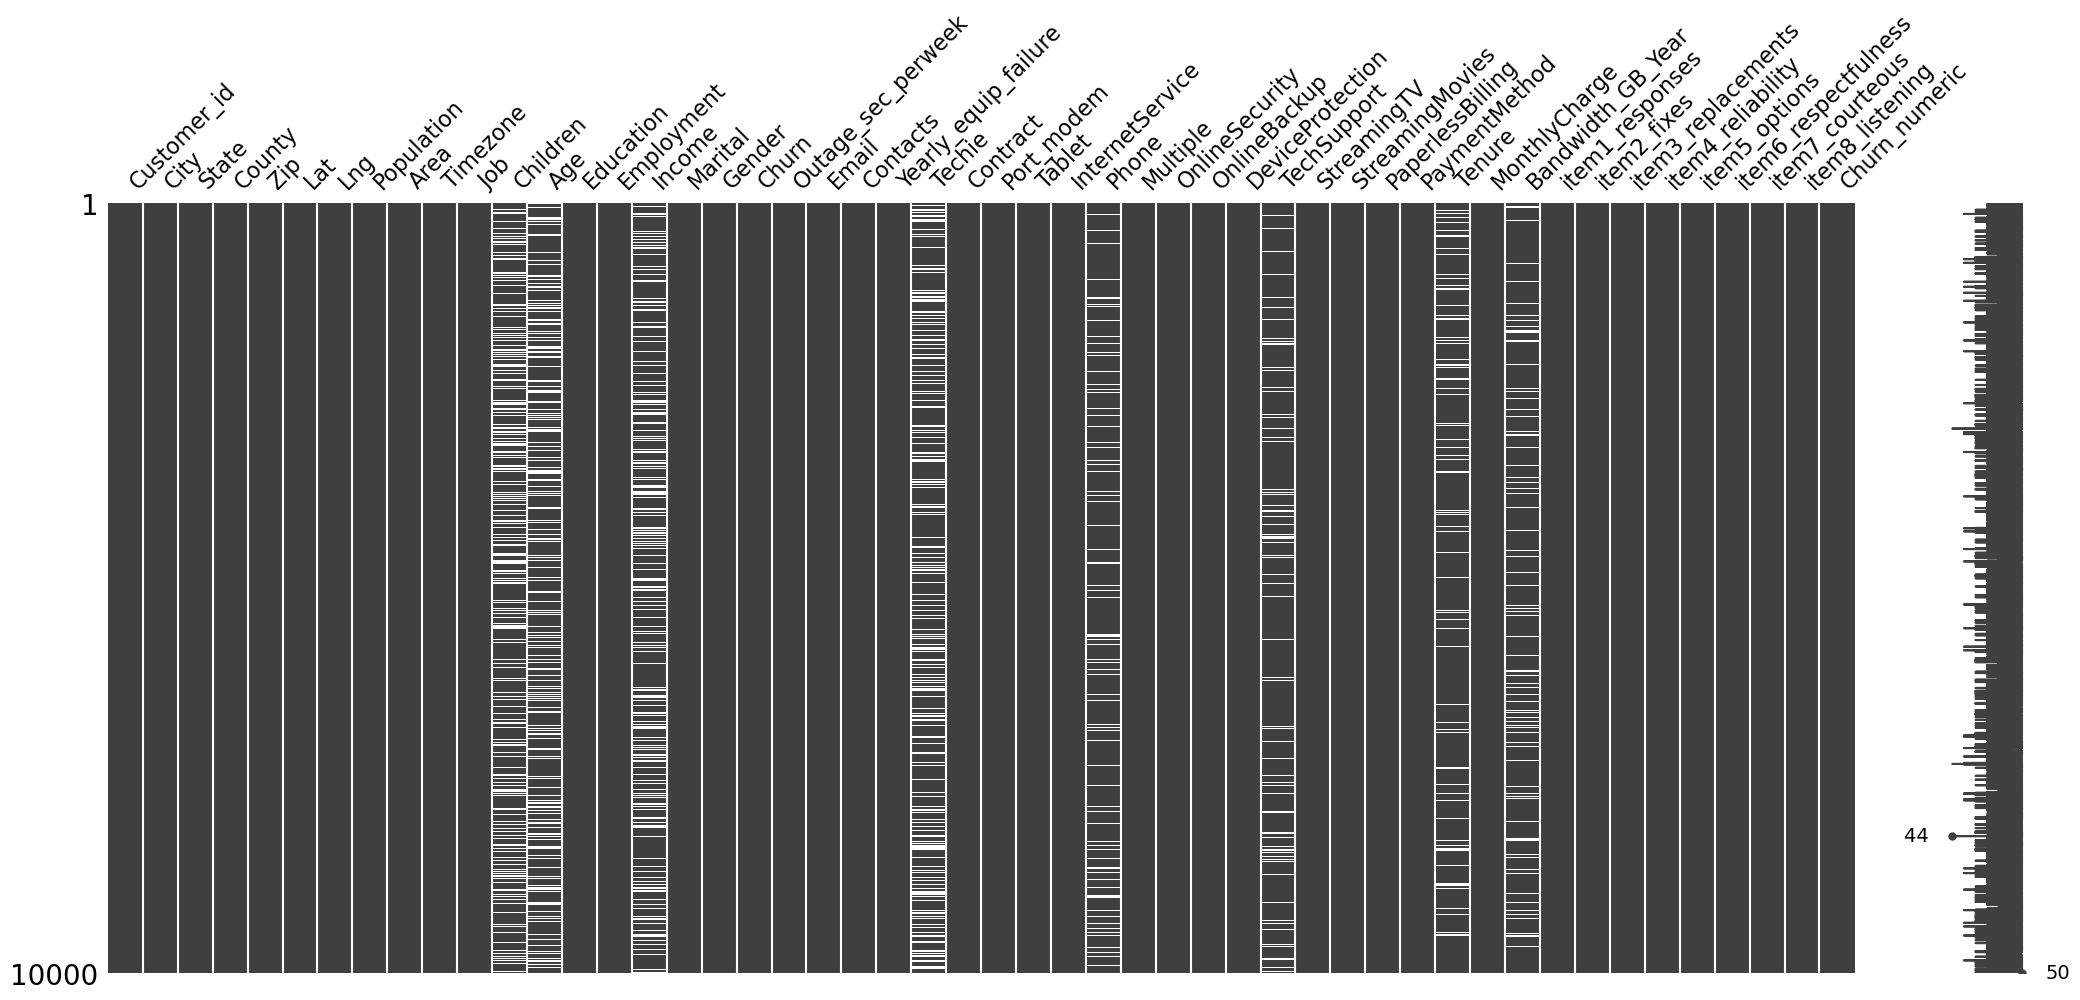

In [277]:
#to find missing values
import missingno as msno
msno.matrix(churn_data)
churn_data.isnull().sum()

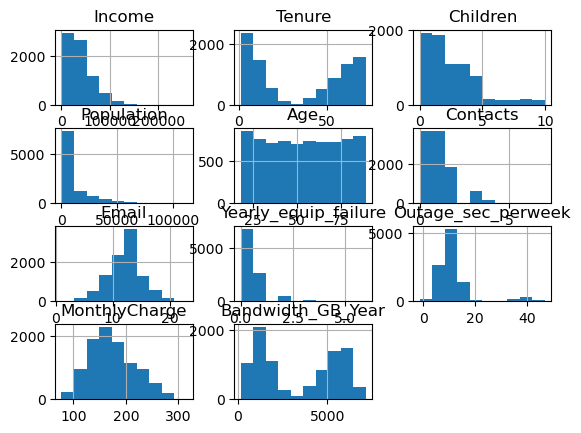

In [278]:
#Let's view some columns for missing information
churn_data[['Income', 'Tenure', 'Children', 'Population', 'Age', 'Contacts', 'Email', 'Yearly_equip_failure', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year']].hist()
mpl.show()

Customer_id             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure      

<AxesSubplot:>

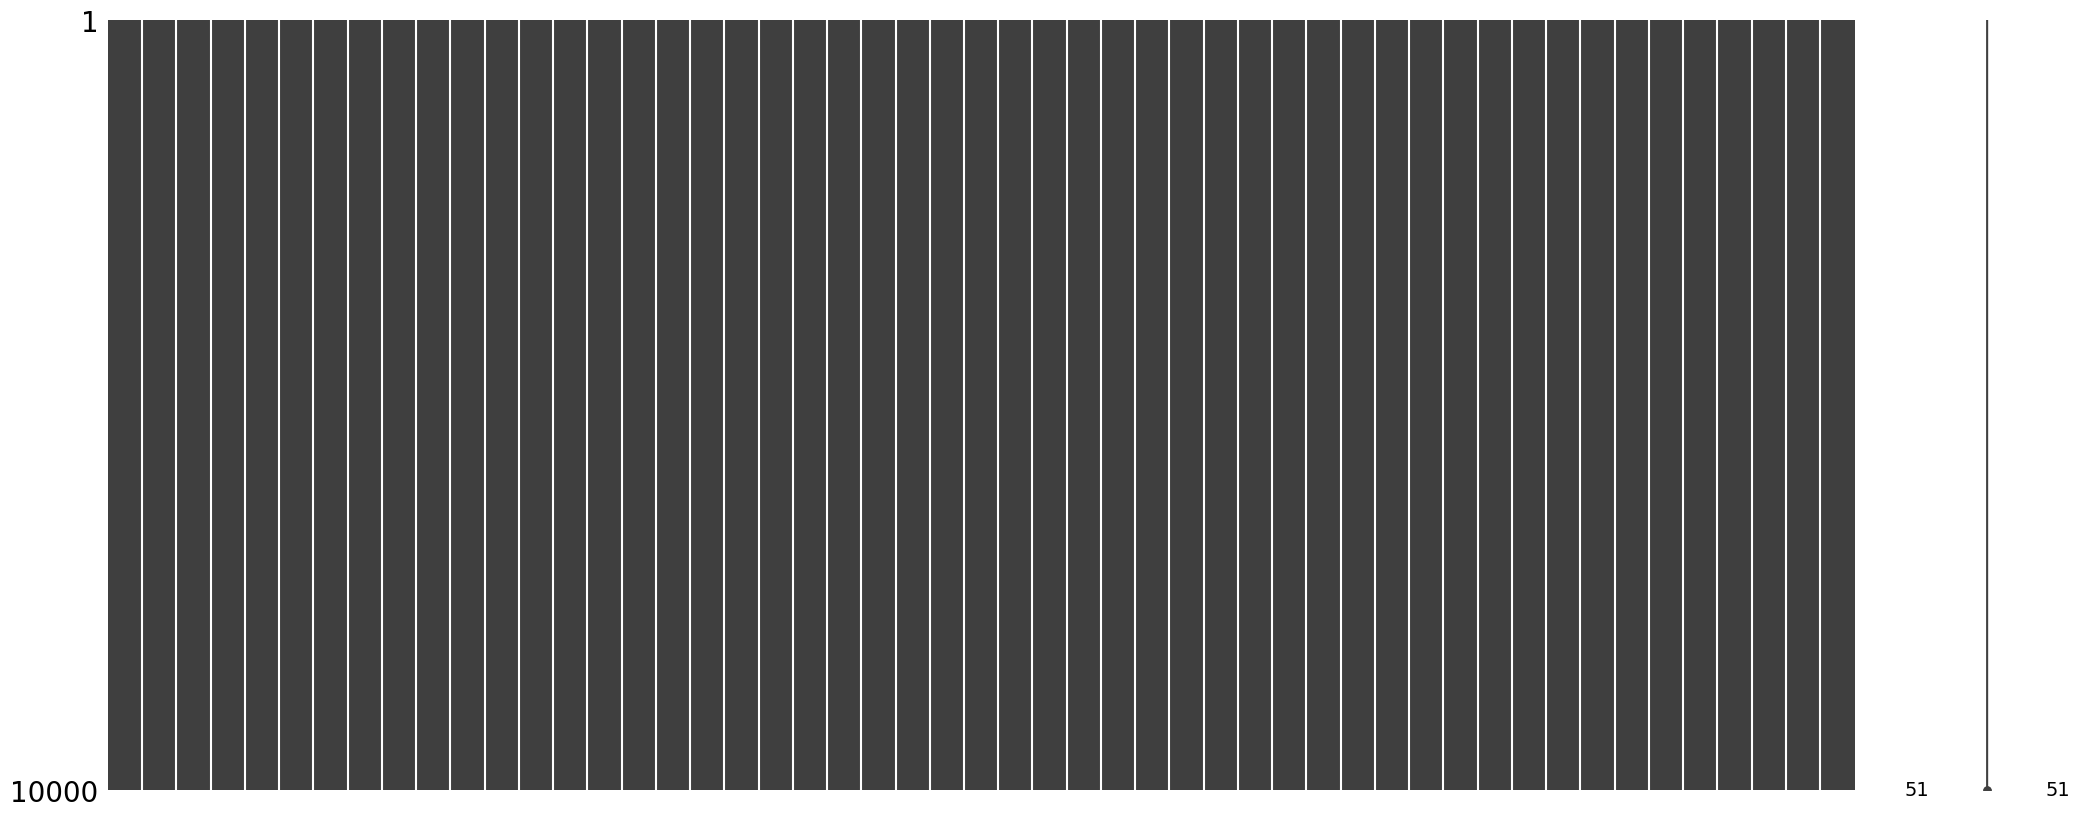

In [286]:
#Mitigating Missing Values
churn_data['Children'].fillna(churn_data['Children'].median(), inplace=True)
churn_data['Age'].fillna(churn_data['Age'].median(), inplace=True)
churn_data['Income'].fillna(churn_data['Income'].median(), inplace=True)
churn_data['Techie'].fillna(churn_data['Techie'].mode(), inplace=True)
churn_data['Phone'].fillna(churn_data['Phone'].mode(), inplace=True)
churn_data['TechSupport'].fillna(churn_data['TechSupport'].mode(), inplace=True)
churn_data['Tenure'].fillna(churn_data['Tenure'].median(), inplace=True)
churn_data.fillna(churn_data['Bandwidth_GB_Year'].median(), inplace=True)

#Here, we can now check for null values
print(churn_data.isnull().sum())


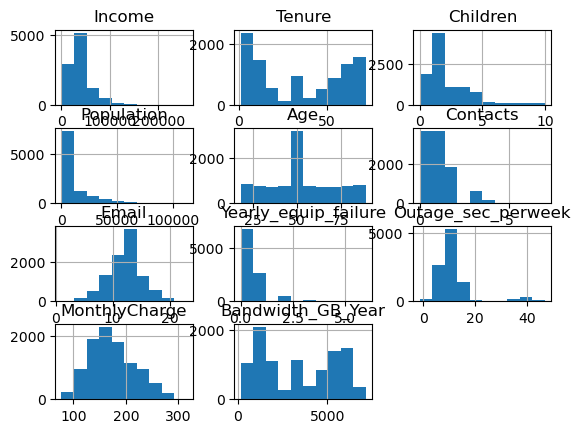

In [280]:
#Let's view the same columns for missing information now
churn_data[['Income', 'Tenure', 'Children', 'Population', 'Age', 'Contacts', 'Email', 'Yearly_equip_failure', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year']].hist()
mpl.show()

<bound method NDFrame.head of          Income  z_score_Income
0     28561.990       -0.391731
1     21704.770       -0.668828
2     33186.785       -0.204845
3     18925.230       -0.781148
4     40074.190        0.073471
...         ...             ...
9995  55723.740        0.705863
9996  33186.785       -0.204845
9997  33186.785       -0.204845
9998  16667.580       -0.872379
9999  33186.785       -0.204845

[10000 rows x 2 columns]>


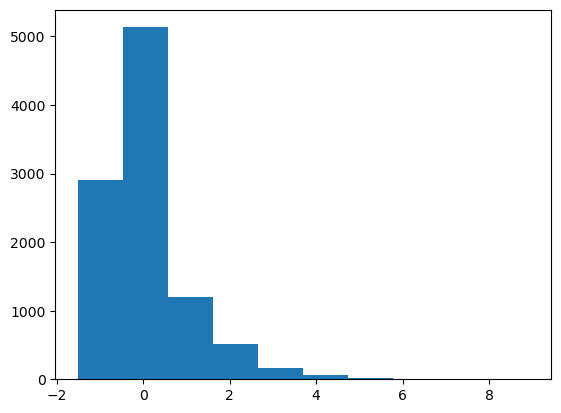

In [281]:
from pandas import DataFrame
import scipy.stats as stats
churn_data['z_score_Income'] = stats.zscore(churn_data['Income'])
print(churn_data[['Income','z_score_Income']].head)
mpl.hist(churn_data['z_score_Income'])
mpl.show()

In [ ]:
churn_data.loc[churn_data['z_score_Income']>=3,'Income']= churn_data['Income'].median()
print(churn_data[['Income','z_score_Income']].head)
mpl.hist(churn_data['z_score_Income'])

In [ ]:
churn_data = [churn_data['z_score_Income'] < 3]
print(churn_data[['Income','z_score_Income']].head)
mpl.hist(churn_data['z_score_Income'])
mpl.show()

In [ ]:
churn_data['z_score_Children']=stats.zscore(churn_data['Children'])
print(churn_data[['Children','z_score_Children']].head)
mpl.hist(churn_data['z_score_Children'])
mpl.show()

In [ ]:
churn_data['z_score_Tenure']=stats.zscore(churn_data['Tenure'])
print(churn_data[['Tenure','z_score_Tenure']].head)
mpl.hist(churn_data['z_score_Tenure'])
mpl.show()

In [ ]:
churn_data['z_score_Population']=stats.zscore(churn_data['Population'])
print(churn_data[['Population','z_score_Population']].head)
mpl.hist(churn_data['z_score_Population'])
mpl.show()

In [ ]:
churn_data['z_score_Age']=stats.zscore(churn_data['Age'])
print(churn_data[['Age','z_score_Age']].head)
mpl.hist(churn_data['z_score_Age'])
mpl.show()

In [ ]:
churn_data['z_score_Contacts']=stats.zscore(churn_data['Contacts'])
print(churn_data[['Contacts','z_score_Contacts']].head)
mpl.hist(churn_data['z_score_Contacts'])
mpl.show()

In [ ]:
churn_data['z_score_Email']=stats.zscore(churn_data['Email'])
print(churn_data[['Email','z_score_Email']].head)
mpl.hist(churn_data['z_score_Email'])
mpl.show()

In [ ]:
churn_data['z_score_Yearly_equip_failure']=stats.zscore(churn_data['Yearly_equip_failure'])
print(churn_data[['Yearly_equip_failure','z_score_Yearly_equip_failure']].head)
mpl.hist(churn_data['z_score_Yearly_equip_failure'])
mpl.show()

In [ ]:
churn_data['z_score_Outage_sec_perweek']=stats.zscore(churn_data['Outage_sec_perweek'])
print(churn_data[['Outage_sec_perweek','z_score_Outage_sec_perweek']].head)
mpl.hist(churn_data['z_score_Outage_sec_perweek'])
mpl.show()

In [ ]:
churn_data['z_score_MonthlyCharge']=stats.zscore(churn_data['MonthlyCharge'])
print(churn_data[['MonthlyCharge','z_score_MonthlyCharge']].head)
mpl.hist(churn_data['z_score_MonthlyCharge'])
mpl.show()

In [ ]:
churn_data['z_score_Bandwidth_GB_Year']=stats.zscore(churn_data['Bandwidth_GB_Year'])
print(churn_data[['Bandwidth_GB_Year','z_score_Bandwidth_GB_Year']].head)
mpl.hist(churn_data['z_score_Bandwidth_GB_Year'])
mpl.show()

In [ ]:
churn_data.to_csv(r'C:\Users\seans\Documents\WGU\D206\churn_cleaned.csv')

In [282]:
#Let's do some PCA analysis
from sklearn.decomposition import PCA
import seaborn as sns
churn_pca = churn_data[['Income', 'Tenure', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year']]
churn_normalized=(churn_pca-churn_pca.mean())/churn_pca.std()
pca = PCA(n_components=churn_pca.shape[1])
pca.fit(churn_normalized)
churn_pca1 = pd.DataFrame(pca.transform(churn_normalized),columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [284]:
#Loadings
loadings = pd.DataFrame(pca.components_.T,
columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
index=churn_normalized.columns)
loadings

,PC1,PC2,PC3,PC4,PC5
Income,0.005975,-0.001356,0.997951,-0.063676,0.000843
Tenure,0.705360,-0.057918,-0.001425,0.035745,-0.705573
Outage_sec_perweek,0.022378,0.705639,0.045918,0.706728,0.000158
MonthlyCharge,0.045469,0.706129,-0.044166,-0.703600,-0.048063
Bandwidth_GB_Year,0.707010,-0.009953,-0.005625,-0.012242,0.707005


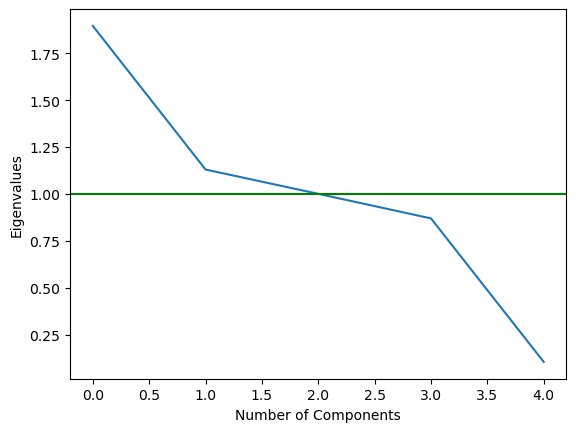

In [285]:
#Now we need to select our most important PC's.
churn_matrix = np.dot(churn_normalized.T, churn_normalized) / churn_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(churn_matrix, eigenvector)) for eigenvector in pca.components_]
mpl.plot(eigenvalues)
mpl.xlabel('Number of Components')
mpl.ylabel('Eigenvalues')
mpl.axhline(y=1, color="green")
mpl.show()